#Understanding Living Habits of Pet Cats in the UK.ipynb

**Section B Team 12**

**Group Member; Kaixin Gao, Kang Ni, Xiaoyan Wang, Fei Han**

##Dataset Selection & Understanding

##Domain & Context

The Pet Cats UK dataset comes from the Movebank for Animal Tracking Data and contains high-resolution GPS tracking and metadata for domestic cats in the United Kingdom between 2013 and 2017. Cats were fitted with GPS collars, generating time-stamped location pings that capture fine-grained living habit within and beyond home environments. In addition to spatial trajectories, the dataset includes cat-level characteristics such as age, sex, neuter status, and hunting behavior.

###Motivation

Pet cats are widely distributed across urban areas, yet their living habit is often treated as homogeneous despite growing evidence of substantial individual variation. Analysis of the Pet Cats UK dataset shows that while most cats remain close to their homes, a small subset exhibits irregular living habit. Understanding these differences is important because cats’ movement behaviors directly influence ecological impacts, exposure to risk, and interactions with humans and the urban environment. By identifying distinct movement patterns among urban pet cats, this project aims to support more targeted and evidence-based decision-making for conservation groups, policymakers, and pet owners.

###Stakeholders & Decision-Makers



*   Urban planners and local councils
*   veterinarian

*   Pet owner

*  Urban biodiversity–focused conservation organizations
*   Ecologist






###Data Insights

**Dataset Size & Structure**

**Pet Cats UK (GPS records)**

row: 18,215

column: 11

Description: Time-stamped GPS location data; multiple records per cat capturing movement trajectories。

**Pet Cats UK (Cat metadata)**

row:101

column:16

Description: Cat-level attributes such as age, sex, neuter status, and hunting behavior



**Data Type:**

Pet Cats UK (GPS records)


In [ ]:
display(cats_gps.dtypes)

,0
tag_id,object
event_id,int64
visible,bool
timestamp,object
location_long,float64
location_lat,float64
ground_speed,int64
height_above_ellipsoid,float64
algorithm_marked_outlier,bool
manually_marked_outlier,bool


Pet Cats UK (Cat metadata)


In [ ]:
display(cats_meta.dtypes)

,0
tag_id,object
animal_id,object
animal_taxon,object
deploy_on_date,object
deploy_off_date,object
hunt,object
prey_p_month,float64
animal_reproductive_condition,object
animal_sex,object
hrs_indoors,float64


##EDA

###Data Import and Preparation

In [ ]:
import pandas as pd
import numpy as np

cats_gps_url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2023/2023-01-31/cats_uk.csv"
cats_meta_url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2023/2023-01-31/cats_uk_reference.csv"
cats_gps = pd.read_csv(cats_gps_url)
cats_meta = pd.read_csv(cats_meta_url)
print("GPS dataset shape:", cats_gps.shape)
print("Metadata dataset shape:", cats_meta.shape)

cats_gps.head(), cats_meta.head()

GPS dataset shape: (18215, 11)
Metadata dataset shape: (101, 16)


(  tag_id    event_id  visible             timestamp  location_long  \
 0   Ares  3395610551     True  2017-06-24T01:03:57Z      -5.113851   
 1   Ares  3395610552     True  2017-06-24T01:11:20Z      -5.113851   
 2   Ares  3395610553     True  2017-06-24T02:58:16Z      -5.113730   
 3   Ares  3395610554     True  2017-06-24T03:01:26Z      -5.113774   
 4   Ares  3395610555     True  2017-06-24T03:51:58Z      -5.114247   
 
    location_lat  ground_speed  height_above_ellipsoid  \
 0     50.170315           684                  154.67   
 1     50.170315           936                  154.67   
 2     50.169876          2340                   81.35   
 3     50.169827             0                   67.82   
 4     50.170139          4896                  118.03   
 
    algorithm_marked_outlier  manually_marked_outlier               study_name  
 0                     False                    False  Pet Cats United Kingdom  
 1                     False                    False  Pet C

In [ ]:
print(cats_gps.info())
print(cats_meta.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18215 entries, 0 to 18214
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tag_id                    18215 non-null  object 
 1   event_id                  18215 non-null  int64  
 2   visible                   18215 non-null  bool   
 3   timestamp                 18215 non-null  object 
 4   location_long             18215 non-null  float64
 5   location_lat              18215 non-null  float64
 6   ground_speed              18215 non-null  int64  
 7   height_above_ellipsoid    18215 non-null  float64
 8   algorithm_marked_outlier  18215 non-null  bool   
 9   manually_marked_outlier   18215 non-null  bool   
 10  study_name                18215 non-null  object 
dtypes: bool(3), float64(3), int64(2), object(3)
memory usage: 1.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 16 colum

In [ ]:
cats_gps.isna().sum(), cats_meta.isna().sum()


(tag_id                      0
 event_id                    0
 visible                     0
 timestamp                   0
 location_long               0
 location_lat                0
 ground_speed                0
 height_above_ellipsoid      0
 algorithm_marked_outlier    0
 manually_marked_outlier     0
 study_name                  0
 dtype: int64,
 tag_id                            0
 animal_id                         0
 animal_taxon                      0
 deploy_on_date                    0
 deploy_off_date                   0
 hunt                              9
 prey_p_month                      0
 animal_reproductive_condition     3
 animal_sex                        0
 hrs_indoors                       0
 n_cats                            0
 food_dry                          0
 food_wet                          0
 food_other                       10
 study_site                        0
 age_years                         1
 dtype: int64)

We can see that the first data table has no missing information, but the table containing cat information is missing some data:

9 cats are missing '**hunt**' information

3 cats are missing '**animal_reproductive_condition**' information

10 cats are missing '**food_other**' information

1 cat is missing '**age_years**' information.

In [ ]:
cats_meta[cats_meta['animal_reproductive_condition'].isna()]

,tag_id,animal_id,animal_taxon,deploy_on_date,deploy_off_date,hunt,prey_p_month,animal_reproductive_condition,animal_sex,hrs_indoors,n_cats,food_dry,food_wet,food_other,study_site,age_years
10,Meg-Tag,Meg,Felis catus,2017-07-02T01:02:43Z,2017-07-09T00:36:13Z,True,3.0,NaN,f,12.5,1,True,True,True,UK,8.0
42,Amber-Tag,Amber,Felis catus,2017-07-28T01:03:24Z,2017-08-04T00:07:52Z,True,3.0,NaN,f,7.5,4,True,True,True,UK,4.0
96,Charlie3-Tag,Charlie3,Felis catus,2017-11-20T01:16:41Z,2017-11-26T00:38:20Z,True,7.5,NaN,m,12.5,2,False,True,True,UK,5.0


In [ ]:
cats_meta[cats_meta['age_years'].isna()]

,tag_id,animal_id,animal_taxon,deploy_on_date,deploy_off_date,hunt,prey_p_month,animal_reproductive_condition,animal_sex,hrs_indoors,n_cats,food_dry,food_wet,food_other,study_site,age_years
22,Johnny-Tag,Johnny,Felis catus,2017-07-13T01:02:09Z,2017-07-16T00:08:52Z,True,12.5,Neutered,m,7.5,1,True,True,False,UK,NaN


In [ ]:
cats_meta[cats_meta['hunt'].isna()]

,tag_id,animal_id,animal_taxon,deploy_on_date,deploy_off_date,hunt,prey_p_month,animal_reproductive_condition,animal_sex,hrs_indoors,n_cats,food_dry,food_wet,food_other,study_site,age_years
2,Ares,Ares,Felis catus,2017-06-24T01:03:57Z,2017-06-30T23:58:01Z,NaN,0.0,Neutered,m,7.5,2,True,True,False,UK,3.0
21,Wilfred-Tag,Wilfred,Felis catus,2017-07-13T01:01:06Z,2017-07-20T01:19:06Z,NaN,0.0,Neutered,m,7.5,1,True,False,False,UK,6.0
46,Lightening Bugg-Tag,Lightening Bugg,Felis catus,2017-07-29T01:02:49Z,2017-08-03T03:57:58Z,NaN,0.0,Neutered,m,12.5,2,True,False,False,UK,0.0
57,Jezebel-Tag,Jezebel,Felis catus,2017-08-25T01:50:01Z,2017-09-01T07:58:22Z,NaN,0.0,Spayed,f,17.5,4,True,True,True,UK,14.0
63,Tipsy-Tag,Tipsy,Felis catus,2017-08-28T15:39:12Z,2017-09-04T09:49:38Z,NaN,0.0,Spayed,f,17.5,1,True,False,False,UK,0.0
80,Maggie-Tag,Maggie,Felis catus,2017-09-25T01:03:24Z,2017-10-02T17:22:57Z,NaN,0.0,Spayed,f,22.5,2,True,False,False,UK,3.0
81,Lily-Tag,Lily,Felis catus,2017-09-25T01:03:54Z,2017-10-02T14:57:31Z,NaN,0.0,Spayed,f,22.5,2,True,False,False,UK,9.0
84,Pants-Tag,Pants,Felis catus,2017-09-28T01:02:00Z,2017-10-03T10:45:33Z,NaN,0.0,Neutered,m,12.5,3,True,False,True,UK,8.0
88,Neil-Tag,Neil,Felis catus,2017-09-30T04:28:02Z,2017-10-07T00:04:54Z,NaN,0.0,Neutered,m,7.5,1,True,True,False,UK,7.0


In [ ]:
cats_gps[cats_gps['tag_id'].isin(['Ares', 'Wilfred-Tag', 'Lightening Bugg-Tag', 'Jezebel-Tag','Tipsy-Tag','Maggie-Tag','Lily-Tag','Pants-Tag','Neil-Tag','Johnny-Tag','Meg-Tag','Amber-Tag','Charlie3-Tag'])].count()

,0
tag_id,1817
event_id,1817
visible,1817
timestamp,1817
location_long,1817
location_lat,1817
ground_speed,1817
height_above_ellipsoid,1817
algorithm_marked_outlier,1817
manually_marked_outlier,1817


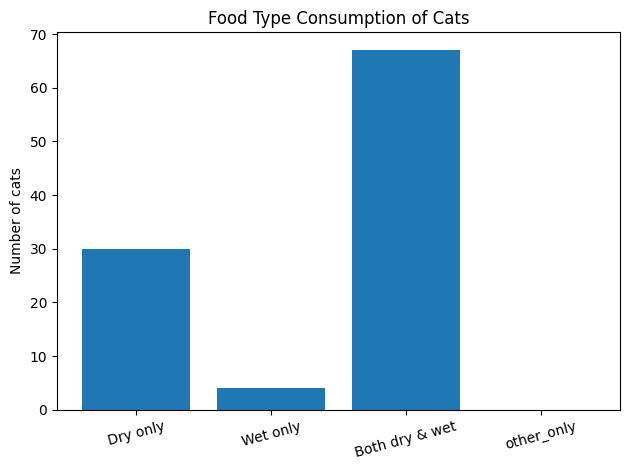

In [ ]:
dry_only = (
    (cats_meta['food_dry'] == True) &
    (cats_meta['food_wet'] == False)
).sum()

wet_only = (
    (cats_meta['food_dry'] == False) &
    (cats_meta['food_wet'] == True)
).sum()

both = (
    (cats_meta['food_dry'] == True) &
    (cats_meta['food_wet'] == True)
).sum()

other_only = (
    (cats_meta['food_dry'] == False) &
    (cats_meta['food_wet'] == False)
).sum()


import matplotlib.pyplot as plt

labels = [
    'Dry only',
    'Wet only',
    'Both dry & wet',
    'other_only'
]

counts = [dry_only, wet_only, both, other_only]

plt.figure()
plt.bar(labels, counts)
plt.ylabel('Number of cats')
plt.title('Food Type Consumption of Cats')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


The table above shows all the cats with missing information (except for 'food_other'). If we remove these cat entries, **1817** rows will be deleted out of a total of **18215** rows, which is approximately **10%**.
For '**food_other**', we plan to delete the entire column. This will not significantly affect our analysis, as no cat eats only 'food_other'.

In [ ]:
full_cats_data = cats_gps.merge(
    cats_meta,
    on='tag_id',
    how='left'
)
full_cats_data

,tag_id,event_id,visible,timestamp,location_long,location_lat,ground_speed,height_above_ellipsoid,algorithm_marked_outlier,manually_marked_outlier,...,prey_p_month,animal_reproductive_condition,animal_sex,hrs_indoors,n_cats,food_dry,food_wet,food_other,study_site,age_years
0,Ares,3395610551,True,2017-06-24T01:03:57Z,-5.113851,50.170315,684,154.67,False,False,...,0.0,Neutered,m,7.5,2,True,True,False,UK,3.0
1,Ares,3395610552,True,2017-06-24T01:11:20Z,-5.113851,50.170315,936,154.67,False,False,...,0.0,Neutered,m,7.5,2,True,True,False,UK,3.0
2,Ares,3395610553,True,2017-06-24T02:58:16Z,-5.113730,50.169876,2340,81.35,False,False,...,0.0,Neutered,m,7.5,2,True,True,False,UK,3.0
3,Ares,3395610554,True,2017-06-24T03:01:26Z,-5.113774,50.169827,0,67.82,False,False,...,0.0,Neutered,m,7.5,2,True,True,False,UK,3.0
4,Ares,3395610555,True,2017-06-24T03:51:58Z,-5.114247,50.170139,4896,118.03,False,False,...,0.0,Neutered,m,7.5,2,True,True,False,UK,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18210,Millie-Tag,4149497976,True,2017-11-26T15:37:52Z,-4.521489,50.869320,1260,144.66,False,False,...,7.5,Spayed,f,12.5,2,False,True,True,UK,3.0
18211,Millie-Tag,4149497977,True,2017-11-26T15:40:59Z,-4.521498,50.869289,16380,136.60,False,False,...,7.5,Spayed,f,12.5,2,False,True,True,UK,3.0
18212,Millie-Tag,4149497978,True,2017-11-26T16:27:31Z,-4.521803,50.869438,4500,160.97,False,False,...,7.5,Spayed,f,12.5,2,False,True,True,UK,3.0
18213,Millie-Tag,4149497979,True,2017-11-26T16:34:26Z,-4.521946,50.869392,1044,179.81,False,False,...,7.5,Spayed,f,12.5,2,False,True,True,UK,3.0


In [ ]:
cleaned_cats_data = full_cats_data[~full_cats_data['tag_id'].isin(['Ares', 'Wilfred-Tag', 'Lightening Bugg-Tag', 'Jezebel-Tag','Tipsy-Tag','Maggie-Tag','Lily-Tag','Pants-Tag','Neil-Tag','Johnny-Tag','Meg-Tag','Amber-Tag','Charlie3-Tag'])]
cleaned_cats_data = cleaned_cats_data.drop('food_other', axis=1)
cleaned_cats_data

,tag_id,event_id,visible,timestamp,location_long,location_lat,ground_speed,height_above_ellipsoid,algorithm_marked_outlier,manually_marked_outlier,...,hunt,prey_p_month,animal_reproductive_condition,animal_sex,hrs_indoors,n_cats,food_dry,food_wet,study_site,age_years
103,Athena,3395610893,True,2017-06-24T01:02:13Z,-5.114018,50.170296,360,78.04,False,False,...,True,3.0,Spayed,f,7.5,2,True,True,UK,3.0
104,Athena,3395610894,True,2017-06-24T01:05:33Z,-5.113985,50.170277,828,70.43,False,False,...,True,3.0,Spayed,f,7.5,2,True,True,UK,3.0
105,Athena,3395610895,True,2017-06-24T02:12:30Z,-5.114270,50.170177,288,65.66,False,False,...,True,3.0,Spayed,f,7.5,2,True,True,UK,3.0
106,Athena,3395610896,True,2017-06-24T02:15:29Z,-5.114331,50.170170,0,75.44,False,False,...,True,3.0,Spayed,f,7.5,2,True,True,UK,3.0
107,Athena,3395610897,True,2017-06-24T05:30:58Z,-5.114207,50.170303,792,68.41,False,False,...,True,3.0,Spayed,f,7.5,2,True,True,UK,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18210,Millie-Tag,4149497976,True,2017-11-26T15:37:52Z,-4.521489,50.869320,1260,144.66,False,False,...,True,7.5,Spayed,f,12.5,2,False,True,UK,3.0
18211,Millie-Tag,4149497977,True,2017-11-26T15:40:59Z,-4.521498,50.869289,16380,136.60,False,False,...,True,7.5,Spayed,f,12.5,2,False,True,UK,3.0
18212,Millie-Tag,4149497978,True,2017-11-26T16:27:31Z,-4.521803,50.869438,4500,160.97,False,False,...,True,7.5,Spayed,f,12.5,2,False,True,UK,3.0
18213,Millie-Tag,4149497979,True,2017-11-26T16:34:26Z,-4.521946,50.869392,1044,179.81,False,False,...,True,7.5,Spayed,f,12.5,2,False,True,UK,3.0


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


We use **left join** to the cats_meta to cats_gps, this will benefit us to analysis.


In [ ]:
cleaned_cats_data.isna().sum()

,0
tag_id,0
event_id,0
visible,0
timestamp,0
location_long,0
location_lat,0
ground_speed,0
height_above_ellipsoid,0
algorithm_marked_outlier,0
manually_marked_outlier,0


###Data analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

cleaned_cats_data['timestamp'] = pd.to_datetime(cleaned_cats_data['timestamp'], errors='coerce')

cleaned_cats_data = cleaned_cats_data.sort_values('timestamp')


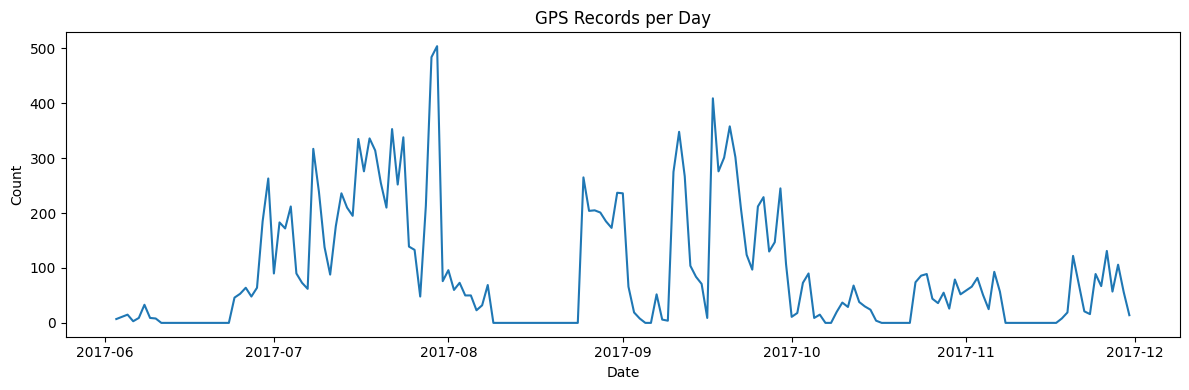

In [ ]:
import matplotlib.pyplot as plt
daily_counts = cleaned_cats_data.set_index('timestamp').resample('D').size()

plt.figure(figsize=(12, 4))
plt.plot(daily_counts.index, daily_counts.values)
plt.title('GPS Records per Day')
plt.xlabel('Date')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


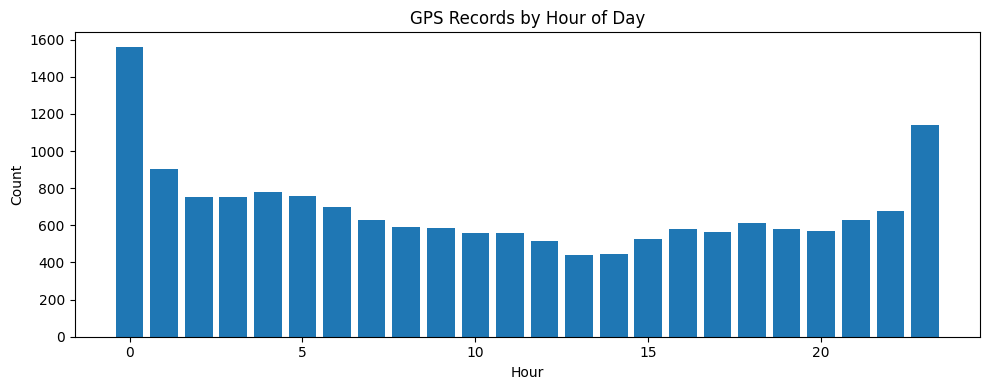

In [ ]:
cleaned_cats_data['hour'] = cleaned_cats_data['timestamp'].dt.hour
hour_counts = cleaned_cats_data['hour'].value_counts().sort_index()

plt.figure(figsize=(10, 4))
plt.bar(hour_counts.index, hour_counts.values)
plt.title('GPS Records by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


The two images above show the number of times a cat was recorded on each day and the number of times the cat was active at different times of the day. We can see that most of the activity records occurred between July and September of 2017. This is very strange that some of days has 0 records, we do think it is made my people in purpose, but we can not find out the reason. These activities all took place during the summer. We can also see that the cat seems to prefer to be active at night, especially around midnight, and is relatively less active during the day. This might be related to the cat's hunting behavior.

In [ ]:
numeric_cols = [
    'location_long', 'location_lat',
    'ground_speed', 'height_above_ellipsoid',
    'algorithm_marked_outlier', 'manually_marked_outlier',
]

meta_numeric_cols = [
    'hunt', 'prey_p_month',
    'hrs_indoors', 'n_cats',
    'food_dry', 'food_wet',
    'age_years'
]



In [ ]:
cleaned_cats_data[numeric_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
location_long,16398.0,-4.985646,0.302770,-5.758854,-5.175573,-5.073744,-4.795586,-4.208614
location_lat,16398.0,50.294399,0.155005,50.103519,50.153252,50.236517,50.436022,50.882217
ground_speed,16398.0,1915.694841,4754.218024,0.000000,396.000000,1080.000000,2196.000000,277092.000000
height_above_ellipsoid,16398.0,106.046328,256.588137,-550.070000,49.100000,82.680000,121.150000,8388.260000


In [ ]:
cleaned_cats_meta = cats_meta[~cats_meta['tag_id'].isin(['Ares', 'Wilfred-Tag', 'Lightening Bugg-Tag', 'Jezebel-Tag','Tipsy-Tag','Maggie-Tag','Lily-Tag','Pants-Tag','Neil-Tag','Johnny-Tag','Meg-Tag','Amber-Tag','Charlie3-Tag'])]
cleaned_cats_meta = cleaned_cats_meta.drop('food_other', axis=1)
cleaned_cats_meta

,tag_id,animal_id,animal_taxon,deploy_on_date,deploy_off_date,hunt,prey_p_month,animal_reproductive_condition,animal_sex,hrs_indoors,n_cats,food_dry,food_wet,study_site,age_years
0,Tommy-Tag,Tommy,Felis catus,2017-06-03T01:02:09Z,2017-06-10T02:10:52Z,True,12.5,Neutered,m,12.5,2,True,True,UK,11.0
1,Athena,Athena,Felis catus,2017-06-24T01:02:13Z,2017-06-30T23:59:32Z,True,3.0,Spayed,f,7.5,2,True,True,UK,3.0
3,Lola,Lola,Felis catus,2017-06-24T01:18:49Z,2017-06-30T09:04:40Z,True,3.0,Spayed,f,17.5,1,True,True,UK,10.0
4,Maverick,Maverick,Felis catus,2017-06-25T01:04:35Z,2017-07-03T09:10:07Z,True,3.0,Neutered,m,12.5,1,True,True,UK,7.0
5,Coco,Coco,Felis catus,2017-06-28T01:02:22Z,2017-07-05T06:50:04Z,True,3.0,Spayed,f,12.5,2,True,True,UK,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Jasper-Tag,Jasper,Felis catus,2017-11-18T01:46:24Z,2017-11-25T01:11:30Z,True,12.5,Neutered,m,7.5,1,True,False,UK,2.0
97,Millie-Tag,Millie,Felis catus,2017-11-20T01:38:55Z,2017-11-27T00:09:29Z,True,7.5,Spayed,f,12.5,2,False,True,UK,3.0
98,SmokeyLongnose-Tag,SmokeyLongnose,Felis catus,2017-11-20T01:47:42Z,2017-11-27T02:53:41Z,True,0.5,Spayed,f,7.5,2,True,True,UK,9.0
99,CJ-Tag,CJ,Felis catus,2017-11-24T06:48:32Z,2017-11-29T03:44:48Z,True,0.5,Neutered,m,22.5,2,True,True,UK,5.0


In [ ]:
cleaned_cats_meta[meta_numeric_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
prey_p_month,88.0,4.000000,4.925304,0.0,0.5,3.0,3.00,17.5
hrs_indoors,88.0,11.704545,5.190972,2.5,7.5,12.5,17.50,22.5
n_cats,88.0,2.090909,0.990023,1.0,1.0,2.0,3.00,4.0
age_years,88.0,5.397727,3.320226,0.0,3.0,5.0,7.25,16.0


To avoid data **imbalance** (as the number of events per cat could affect data balance), we analyzed the **two sets of numerical variables** separately. One set was related to the **events**, and the other was related to the **cats** themselves.

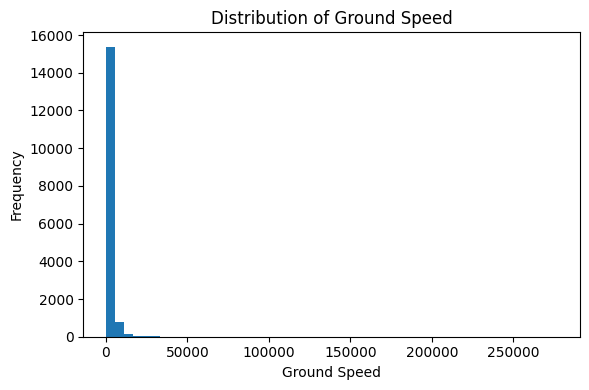

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(cleaned_cats_data['ground_speed'].dropna(), bins=50)
plt.title('Distribution of Ground Speed')
plt.xlabel('Ground Speed')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


About ground speed of cats, most of record are in a low range, but barely of it will have extremely high, some of this could be a outliers

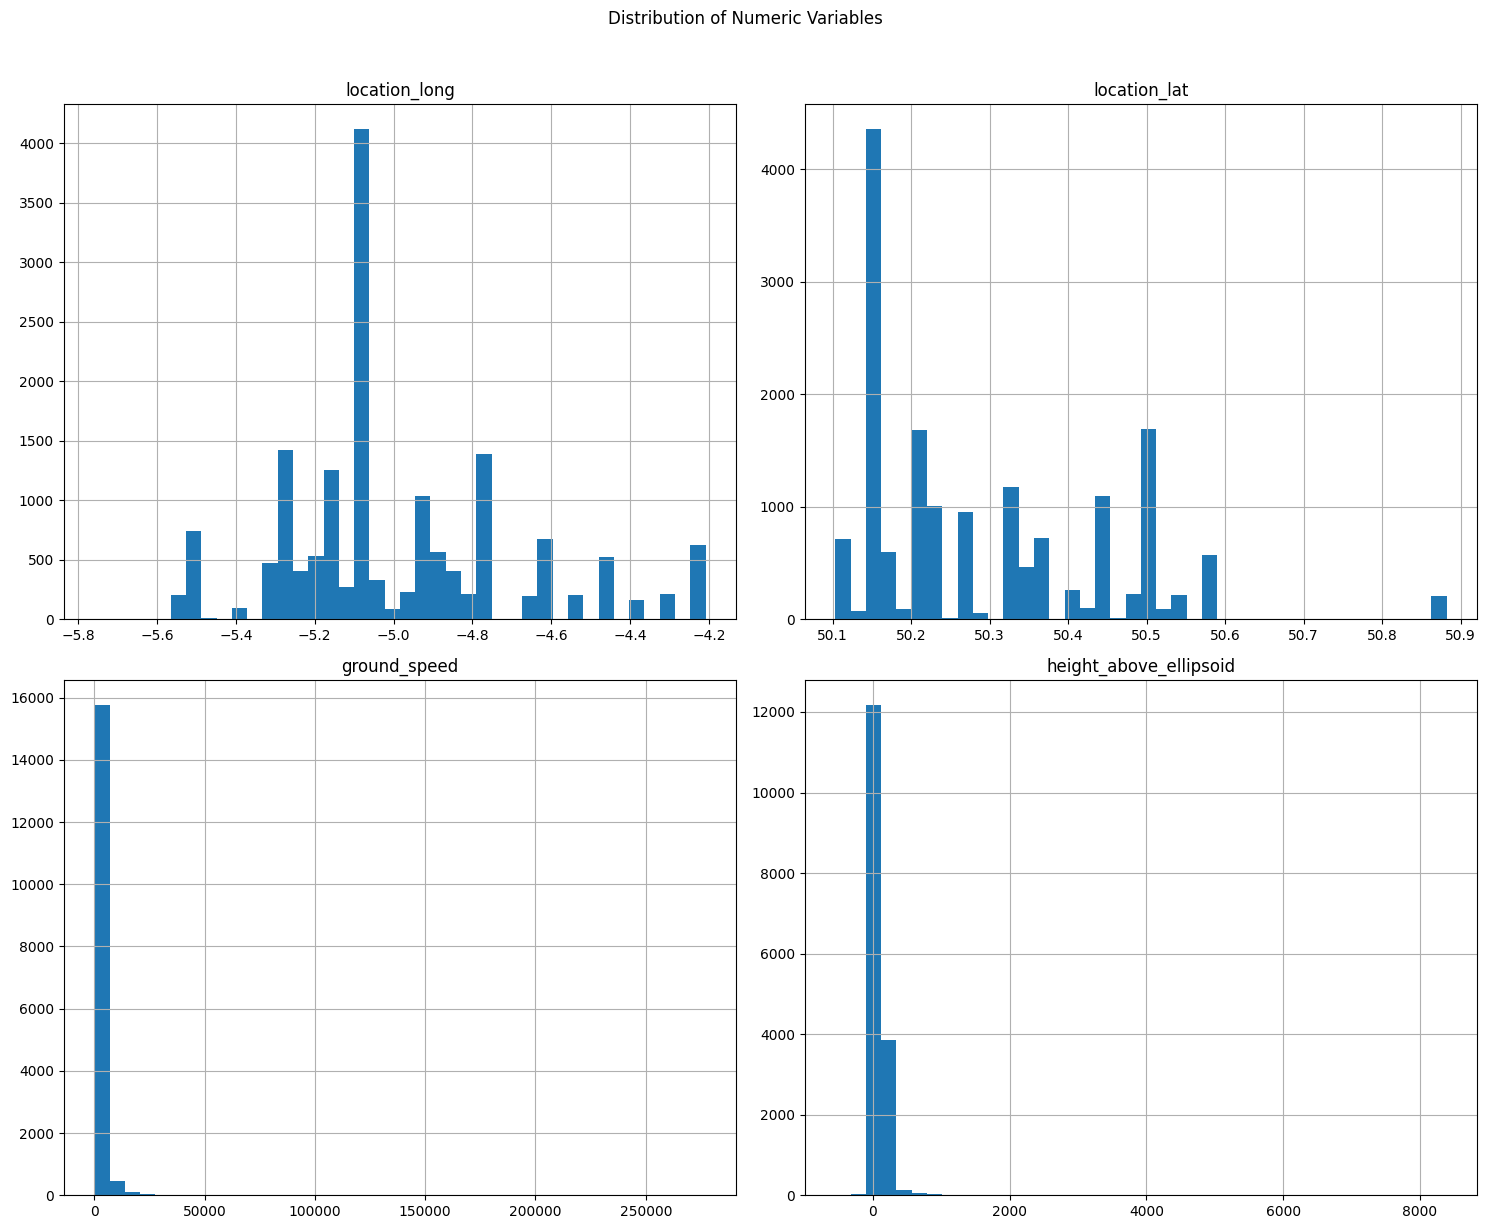

In [ ]:
cleaned_cats_data[numeric_cols].hist(
    bins=40,
    figsize=(15, 12)
)
plt.suptitle('Distribution of Numeric Variables', y=1.02)
plt.tight_layout()
plt.show()


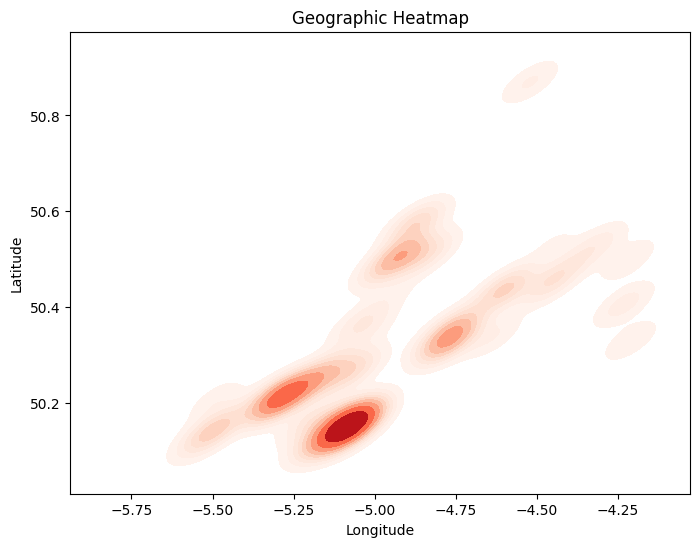

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.kdeplot(
    x=cleaned_cats_data["location_long"],
    y=cleaned_cats_data["location_lat"],
    cmap="Reds",
    fill=True,
    thresh=0.05
)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographic Heatmap")
plt.show()


In [ ]:
pip install geopandas contextily pyproj


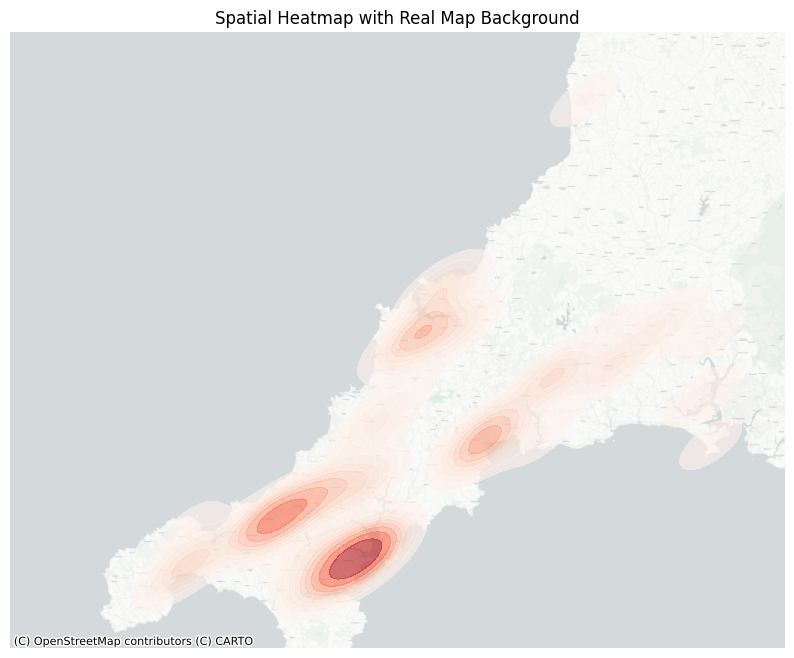

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

gdf = gpd.GeoDataFrame(
    cleaned_cats_data,
    geometry=gpd.points_from_xy(cleaned_cats_data["location_long"], cleaned_cats_data["location_lat"]),
    crs="EPSG:4326"  # WGS84 (lat/lon)
)

gdf = gdf.to_crs(epsg=3857)

import matplotlib.pyplot as plt
import seaborn as sns
import contextily as ctx

fig, ax = plt.subplots(figsize=(10, 8))

sns.kdeplot(
    x=gdf.geometry.x,
    y=gdf.geometry.y,
    cmap="Reds",
    fill=True,
    thresh=0.05,
    alpha=0.6,
    ax=ax
)

# Add real map background
ctx.add_basemap(
    ax,
    source=ctx.providers.CartoDB.Positron,  # very stable
    zoom=12
)

ax.set_axis_off()
ax.set_title("Spatial Heatmap with Real Map Background")
plt.show()


The map do show some infomation that some of the cat will active in specific area, this could be a interested point to analysis.(but it is not necessary to use)

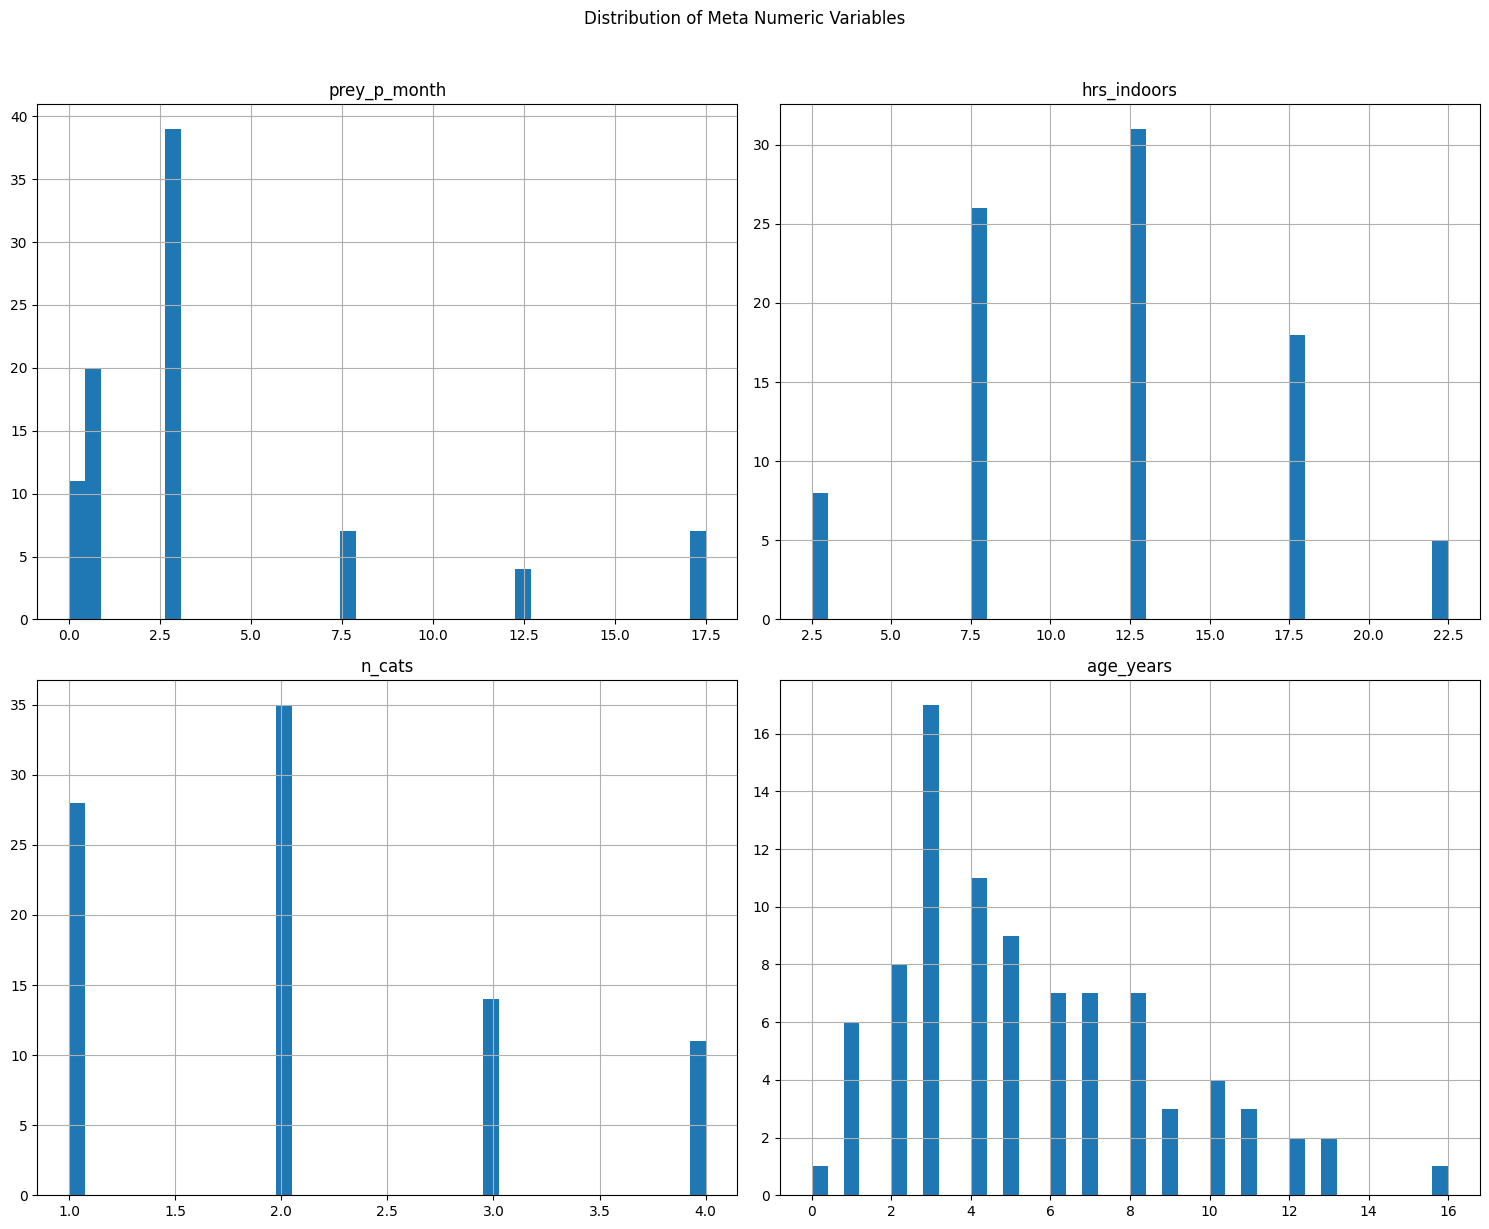

In [ ]:
cleaned_cats_meta[meta_numeric_cols].hist(
    bins=40,
    figsize=(15, 12)
)
plt.suptitle('Distribution of Meta Numeric Variables', y=1.02)
plt.tight_layout()
plt.show()


This is the graph for cat analysis, we dont see there is any interested things in this part, but we do think these feature will help for machine learing.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

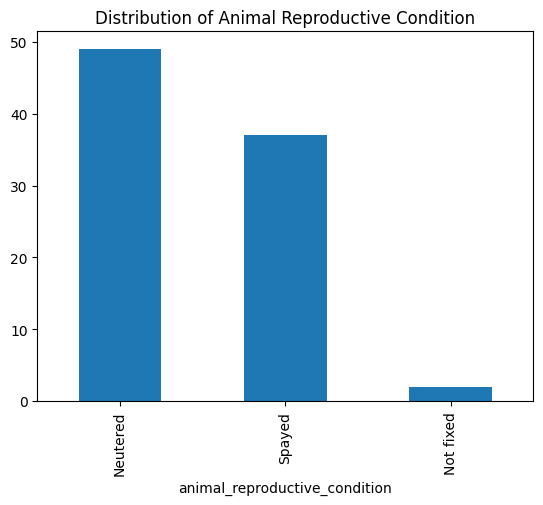

In [ ]:

cleaned_cats_meta['animal_reproductive_condition'].value_counts().plot(kind='bar')
plt.title('Distribution of Animal Reproductive Condition')
plt

We will find out most of cats had been Neutered or Spayed, there is a few of it had not yet. We think we can work on Neutered and Spayed cats, and we may ignore it or delete the Not fixed cat later to avoid noises.

In [ ]:
both_outliers = cleaned_cats_data[
    (cleaned_cats_data['manually_marked_outlier'] == 1) &
    (cleaned_cats_data['algorithm_marked_outlier'] == 1)
]

both_outliers


,tag_id,event_id,visible,timestamp,location_long,location_lat,ground_speed,height_above_ellipsoid,algorithm_marked_outlier,manually_marked_outlier,...,prey_p_month,animal_reproductive_condition,animal_sex,hrs_indoors,n_cats,food_dry,food_wet,study_site,age_years,hour
6047,Chloe-Tag,3459772587,False,2017-07-26 03:44:26+00:00,-5.077784,50.151039,6732,-74.79,True,True,...,3.0,Spayed,f,17.5,2,True,True,UK,7.0,3
17698,Seb-Tag,4149451128,False,2017-11-26 02:27:32+00:00,-5.213822,50.232414,1188,1441.71,True,True,...,3.0,Neutered,m,12.5,2,True,False,UK,3.0,2


In [ ]:
algo_pct = f"{cleaned_cats_data['algorithm_marked_outlier'].mean() * 100:.2f}%"
manual_pct = f"{cleaned_cats_data['manually_marked_outlier'].mean() * 100:.2f}%"

algo_pct, manual_pct


('1.18%', '0.80%')

There a very few event are taged as 'outliers', but we are not sure how the algorithm and the data manager define the the 'outliers' so we think we probabily will not focus on these columns.

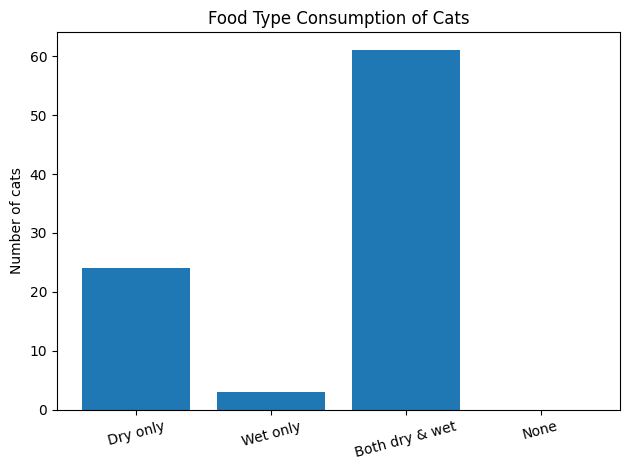

In [ ]:
dry_only = (
    (cleaned_cats_meta['food_dry'] == True) &
    (cleaned_cats_meta['food_wet'] == False)
).sum()

wet_only = (
    (cleaned_cats_meta['food_dry'] == False) &
    (cleaned_cats_meta['food_wet'] == True)
).sum()

both = (
    (cleaned_cats_meta['food_dry'] == True) &
    (cleaned_cats_meta['food_wet'] == True)
).sum()

none = (
    (cleaned_cats_meta['food_dry'] == False) &
    (cleaned_cats_meta['food_wet'] == False)
).sum()

import matplotlib.pyplot as plt

labels = [
    'Dry only',
    'Wet only',
    'Both dry & wet',
    'None'
]

counts = [dry_only, wet_only, both, none]

plt.figure()
plt.bar(labels, counts)
plt.ylabel('Number of cats')
plt.title('Food Type Consumption of Cats')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


These is the graph shows the food habit for each cats, most of cats will have both dry and wet food, some of them have Dry only and very few will have wet only. We do think this is a very interested part and we can work on it.

##Domain / Business Questions

###Question 1

**Q1: How can unsupervised machine learning methods be used to identify spatial clustering patterns in cat locations, and how do these clusters relate to environmental factors and observed behavioral traits?**

**Insights**:

Based on the distribution map in the EDA section, clear spatial clusters are observed, motivating further analysis of the factors driving these clusters and the impacts they may have.

**Significance**:

This analysis is important for understanding cats’ living conditions and spatial distribution across urban areas. Policymakers and city councils can use these insights to develop more effective and region-specific animal control policies. Biodiversity conservation groups can also leverage this information to guide member allocation and resource deployment.



###Question 2

**Q2: How do cats form distinct clusters when analyzed by time period and ground speed using unsupervised methods?**

**Insights**:

The EDA results show that cats exhibit particularly high activity levels during nighttime hours, especially around 11 PM and 12 AM. Analyzing temporal activity patterns provides deeper insight into cats’ living habits and behavioral dynamics.

**Significance**:

Understanding the daily activity patterns of cats provides valuable insights for researchers studying behavioral traits and the influence of environmental factors on living habits. From a policy perspective, city governments can use this temporal information to design targeted, time-based management strategies aimed at reducing animal-related damage and improving urban coexistence.


###Question 3

**Q3： How do male cats and female cats distribute across the city, and how do their living traits influence differences in these spatial patterns?**

**Insights**:

The distribution of animal reproductive condition in EDA part shows that female cats are substantially underrepresented compared to male cats. This pronounced gender imbalance in the dataset was unexpected and motivated further investigation into the potential impact of cat gender on observed behavioral patterns.

**Significance**:

This analysis is important for potential pet owners considering the adoption of a cat. It helps evaluate the advantages and disadvantages of female and male cats by comparing individual behavioral traits and assessing their potential impacts on the ecological system.


###Question 4

**Q4: When cats are grouped based on similarity in their overall living habits—such as activity regularity, spatial concentration around the home area, and consistency of daily behavior—do distinct behavioral profiles emerge, and how do different feeding types (for example, reliance on owner-provided food versus access to hunting) distribute across these naturally occurring groups?**

**Insights**:

The Food Type Consumption graph illustrate  the food habits for each cat, most of the cats will have both dry and wet food, some of them have Dry only, and very few will have wet only. We do think this is a very interesting part, and we can work on it.


**significance**:

This analyzes the Information on feeding food types can help government animal control agencies and pet owners better understand how feeding behaviors influence cats’ living patterns. These insights can also support animal shelters and pet owners in selecting appropriate food types to protect biodiversity and ecological systems while improving interactions between cats and humans.


## AI Disclosure











*   Coding Aid(part)

*   Text Revision

*   Grammar Check
*   Project Initial Brainstorm


*   Formating



ChatGPT Link:



*  https://chatgpt.com/share/697a9b46-3ef8-8010-bee1-777f61fbd716
*  https://chatgpt.com/share/697a9d19-672c-8013-8590-1e9d1a087f95


